CLOTH PREDICTION

In [5]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
import sys
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from tensorflow.keras.models import Sequential

In [7]:
#defining folder path to data and folders for classification
DATADIR = "/content/drive/MyDrive/ic/Data"
CATEGORIES = ["sarees", "jeans", "trousers"]

In [8]:
#reading images from the folder using cv2 
#Adding the images and curresponding labels to the list
train_images = []       
train_labels = []
shape = (200,200)

for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    train_labels.append(category)
    img1 = cv2.imread(os.path.join(path, img))
    #converting the image from BGR to RGB
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img1 = cv2.resize(img1,shape)
    train_images.append(img1)

In [9]:
#check the length of both image list and label list to ensure both have same no. of elements
len(train_images), len(train_labels)

(1200, 1200)

In [10]:
train_images[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [201, 204, 204],
        [237, 242, 242],
        [248, 253, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [247, 254, 252],
        [245, 255, 253],
        [244, 255, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 255, 253],
        [252, 255, 253],
        [252, 255, 253]]

In [11]:
train_labels[:10]

['sarees',
 'sarees',
 'sarees',
 'sarees',
 'sarees',
 'sarees',
 'sarees',
 'sarees',
 'sarees',
 'sarees']

In [12]:
#one hot encoding for training labels
train_labels = pd.get_dummies(train_labels).values

In [13]:
#converting the image list to numpy array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

[0 1 0]


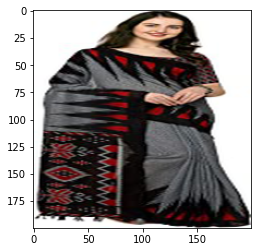

In [14]:
# visualizing training data
print(train_labels[0])
plt.imshow(train_images[0])

[0 0 1]


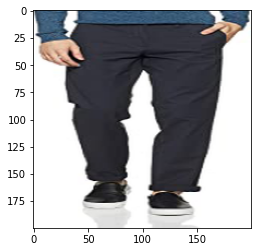

In [15]:
# visualizing training data
print(train_labels[1100])
plt.imshow(train_images[1100])

[1 0 0]


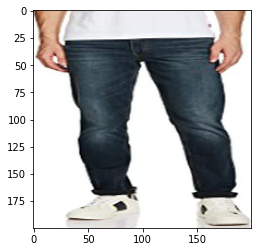

In [16]:
# visualizing training data
print(train_labels[700])
plt.imshow(train_images[700])

In [17]:
# creating a sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(3,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [18]:
# printing model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 30)        8130      
_________________________________________________________________
flatten (Flatten)            (None, 63480)             0

In [19]:
# training the model
history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
18/18 [==============================] - 117s 6s/step - loss: 3.1114 - acc: 0.5356 - val_loss: 0.5764 - val_acc: 0.7900
Epoch 2/50
18/18 [==============================] - 115s 6s/step - loss: 0.5231 - acc: 0.8022 - val_loss: 0.4743 - val_acc: 0.8167
Epoch 3/50
18/18 [==============================] - 116s 6s/step - loss: 0.3235 - acc: 0.8800 - val_loss: 0.2815 - val_acc: 0.8600
Epoch 4/50
18/18 [==============================] - 115s 6s/step - loss: 0.2122 - acc: 0.9222 - val_loss: 0.2809 - val_acc: 0.8633
Epoch 5/50
18/18 [==============================] - 116s 6s/step - loss: 0.1807 - acc: 0.9344 - val_loss: 0.2491 - val_acc: 0.8867
Epoch 6/50
18/18 [==============================] - 116s 6s/step - loss: 0.1797 - acc: 0.9200 - val_loss: 0.3584 - val_acc: 0.8633
Epoch 7/50
18/18 [==============================] - 115s 6s/step - loss: 0.1162 - acc: 0.9567 - val_loss: 0.2835 - val_acc: 0.8933
Epoch 8/50
18/18 [==============================] - 115s 6s/step - loss: 0.1698 - a

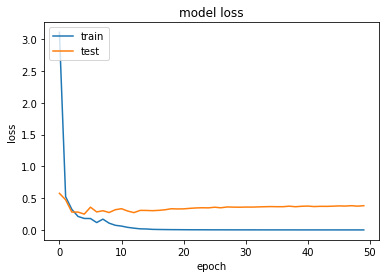

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

10/10 [==============================] - 9s 864ms/step - loss: 0.3815 - acc: 0.9367
[0.3814699947834015, 0.9366666674613953]


In [22]:
import joblib

In [28]:
#saving the model
joblib.dump(model, "/content/drive/MyDrive/ic/cloth-model.obj")

['/content/drive/MyDrive/ic/cloth-model.obj']

In [29]:
#END